In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [3]:
non_feature_columns = ['Ticker Symbol', 'Period Ending', 'Sector', 'For Year', 'Next Qtr. Avg. Price']

# Load the merged dataset
fundamentals = pd.read_csv('../data/merged_data.csv')

# Count the number of stocks in each sector
sector_counts = fundamentals['Sector'].value_counts()

# Display the counts of all sectors
print(sector_counts)


Sector
Consumer Discretionary         249
Industrials                    219
Information Technology         216
Health Care                    154
Energy                         114
Consumer Staples                99
Materials                       89
Utilities                       88
Real Estate                     28
Telecommunications Services     20
Financials                      19
Name: count, dtype: int64


In [4]:
# Create IT Sector data

# Filter data for 'Information Technology' sector
it_sector_data = fundamentals[fundamentals['Sector'] == 'Information Technology']

# Sort the filtered data by 'Ticker Symbol' and 'Period Ending' (assuming this is the desired sorting criteria)
it_sector_data = it_sector_data.sort_values(by=['Ticker Symbol', 'Period Ending'])

# Drop some columns which are redundant and less useful for fundamental analysis
it_sector_data = it_sector_data.drop(columns=["Add'l income/expense items", "Deferred Asset Charges", "Deferred Liability Charges", "Effect of Exchange Rate", "Minority Interest", "Misc. Stocks", "Non-Recurring Items", "Other Assets", "Other Current Assets", "Other Current Liabilities", "Other Equity", "Other Financing Activities", "Other Investing Activities", "Other Liabilities", "Other Operating Activities", "Other Operating Items"])

# Save the filtered and sorted data to a new CSV file
it_sector_data.to_csv('./outputs/it_sector_data.csv', index=False)


Total no. of features: 59

Accounts Payable                                       0.196327
Accounts Receivable                                   -0.199478
After Tax ROE                                          0.007557
Capital Expenditures                                  -0.110488
Capital Surplus                                       -0.121812
Cash Ratio                                            -0.090515
Cash and Cash Equivalents                              0.116077
Changes in Inventories                                 0.073836
Common Stocks                                          0.172621
Cost of Revenue                                        0.193458
Current Ratio                                         -0.050127
Depreciation                                           0.133997
Earnings Before Interest and Tax                       0.232571
Earnings Before Tax                                    0.229545
Equity Earnings/Loss Unconsolidated Subsidiary        -0.156713
Fixed Assets 

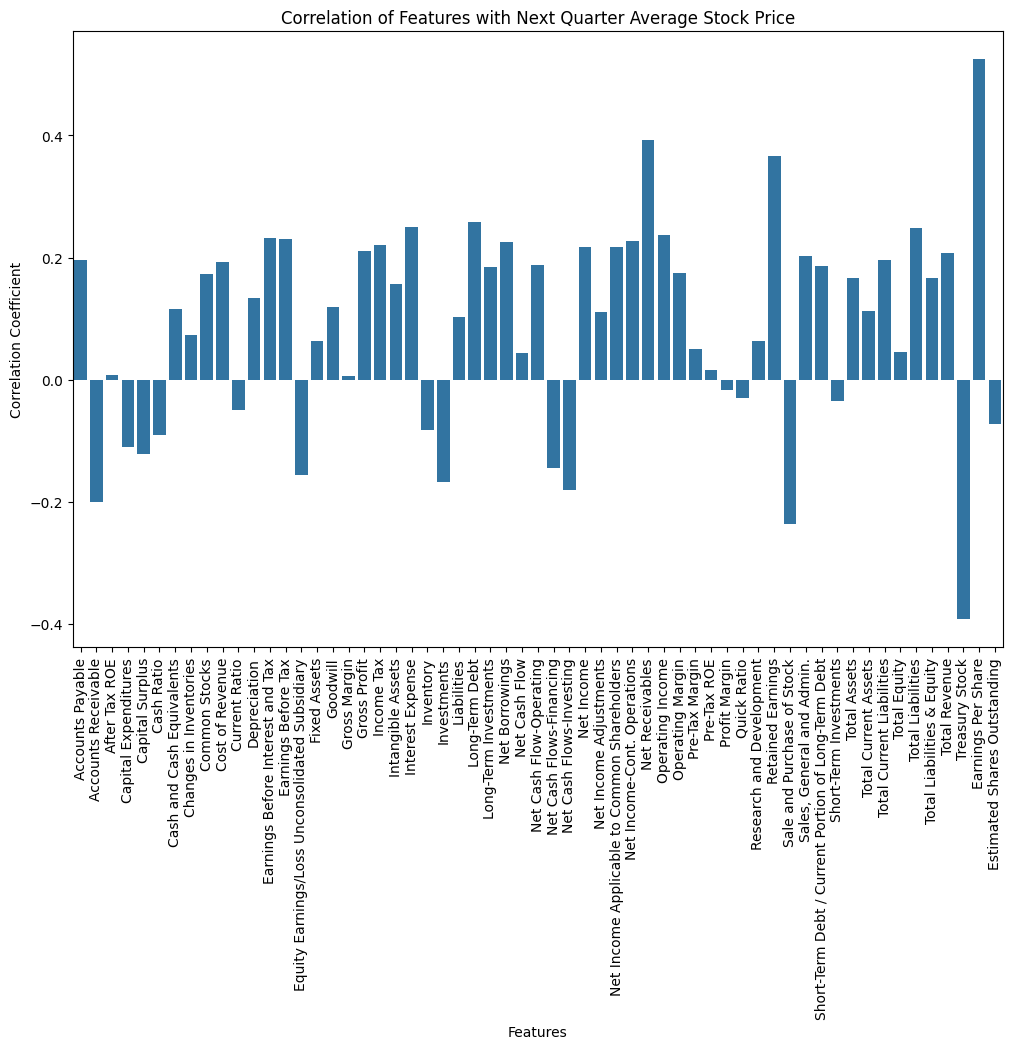

In [5]:
# Load IT sector 
it_sector_data = pd.read_csv('./outputs/it_sector_data.csv')

# Select features and target variable
features = it_sector_data.drop(columns=non_feature_columns)
target = it_sector_data['Next Qtr. Avg. Price']

print(f'Total no. of features: {features.columns.size}\n')

# Combine features and target into a single DataFrame for correlation analysis
combined_data = pd.concat([features, target], axis=1)

# Calculate the correlation matrix
corr_matrix = combined_data.corr()

# Extract correlation of each feature with the target variable
target_corr = corr_matrix['Next Qtr. Avg. Price'].drop('Next Qtr. Avg. Price')

# Display the correlation of each feature with the target variable
print(target_corr)

# Visualize the correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Next Quarter Average Stock Price')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()


In [6]:
# Define LinearRegression model
model = LinearRegression()

# Initialize RFE to pick the top 30 out of the 59 features
rfe = RFE(estimator=model, n_features_to_select=30)

# Fit RFE
rfe.fit(features, target)

# Get the selected features
selected_features = features.columns[rfe.support_]

print(f'Selected Features:\n{selected_features}')

final_it_data = pd.DataFrame()
final_it_data['Ticker Symbol'] = it_sector_data['Ticker Symbol']
final_it_data['Period Ending'] = it_sector_data['Period Ending']
final_it_data[selected_features] = it_sector_data[selected_features]
final_it_data['Next Qtr. Avg. Price'] = it_sector_data['Next Qtr. Avg. Price'].round(2)

final_it_data.to_csv('../data/data_it.csv')

Selected Features:
Index(['After Tax ROE', 'Cash Ratio', 'Changes in Inventories',
       'Cost of Revenue', 'Current Ratio', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Gross Margin', 'Gross Profit', 'Interest Expense', 'Liabilities',
       'Net Cash Flow', 'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income',
       'Net Income Applicable to Common Shareholders', 'Operating Margin',
       'Pre-Tax Margin', 'Pre-Tax ROE', 'Profit Margin', 'Quick Ratio',
       'Sales, General and Admin.', 'Total Assets', 'Total Equity',
       'Total Liabilities', 'Total Liabilities & Equity', 'Total Revenue',
       'Earnings Per Share'],
      dtype='object')


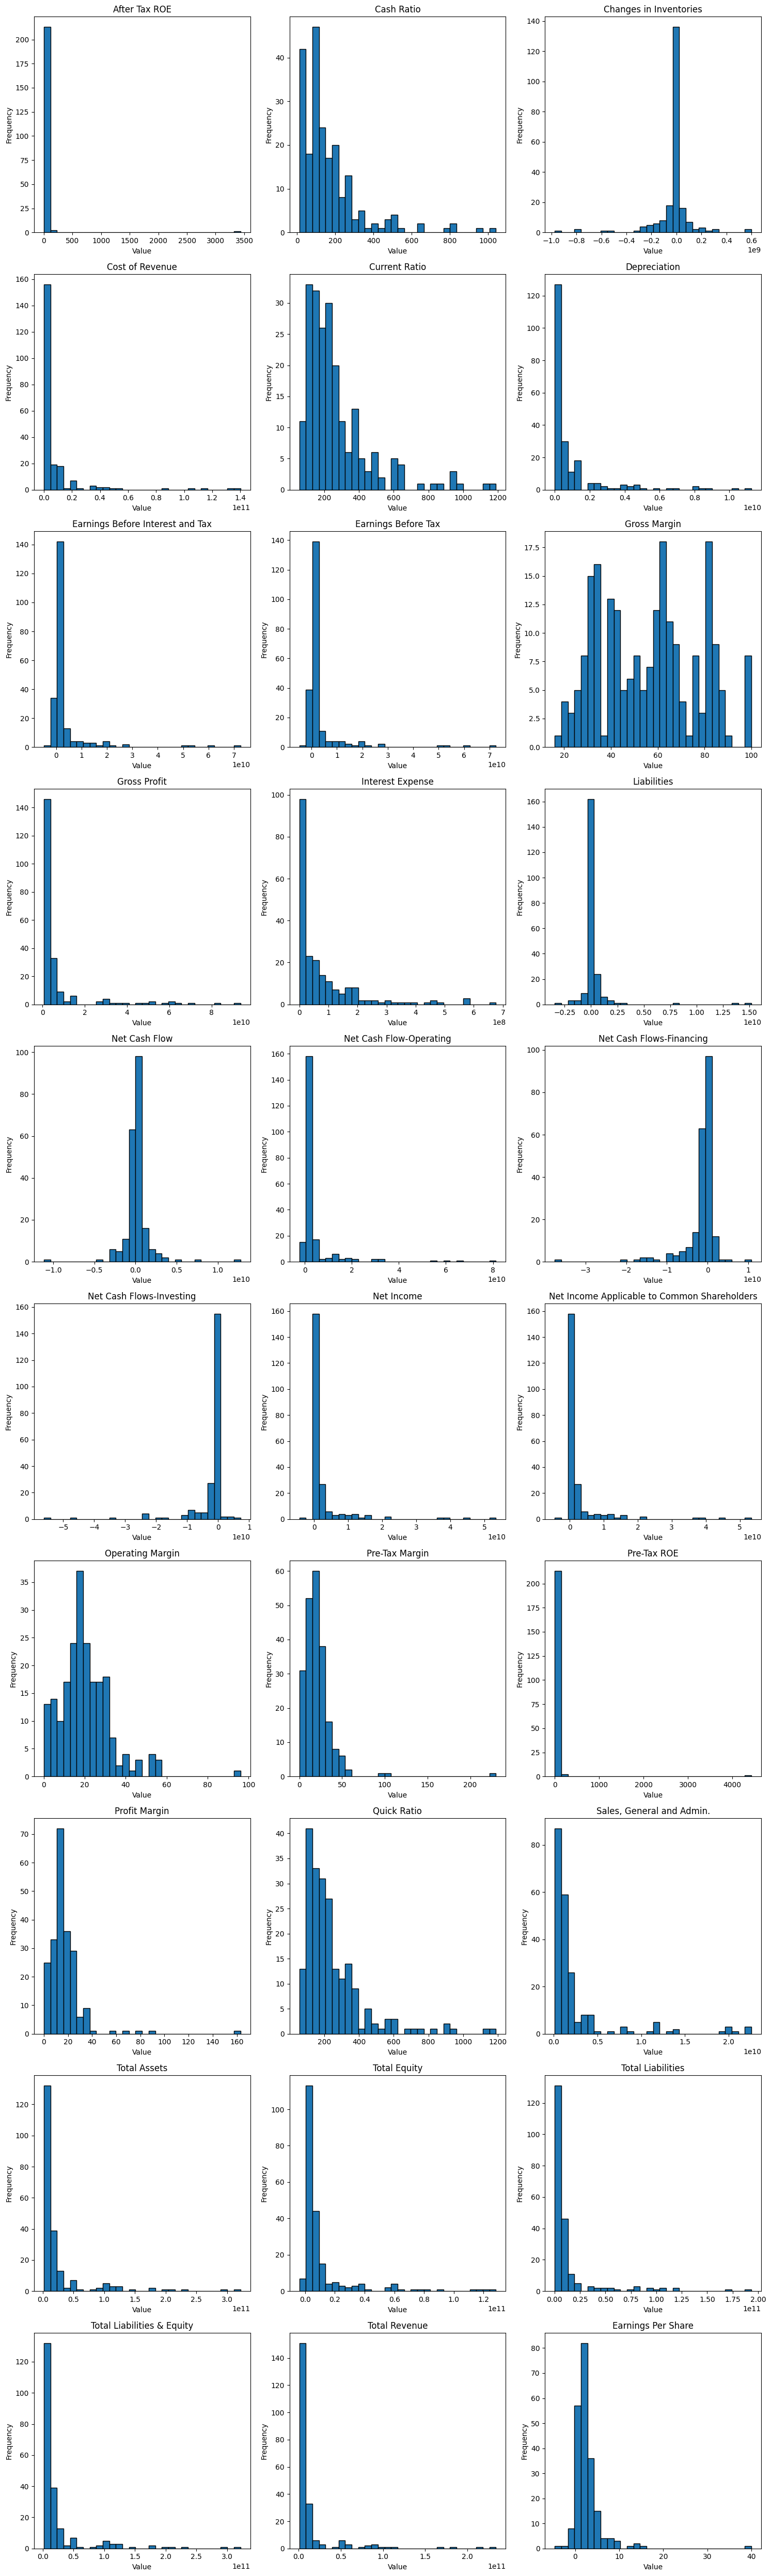

In [7]:
num_features = len(selected_features)

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_features//3 + (num_features % 3 > 0), ncols=3, figsize=(15, 5*num_features//3 + (num_features % 3 > 0)))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].hist(final_it_data[feature].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


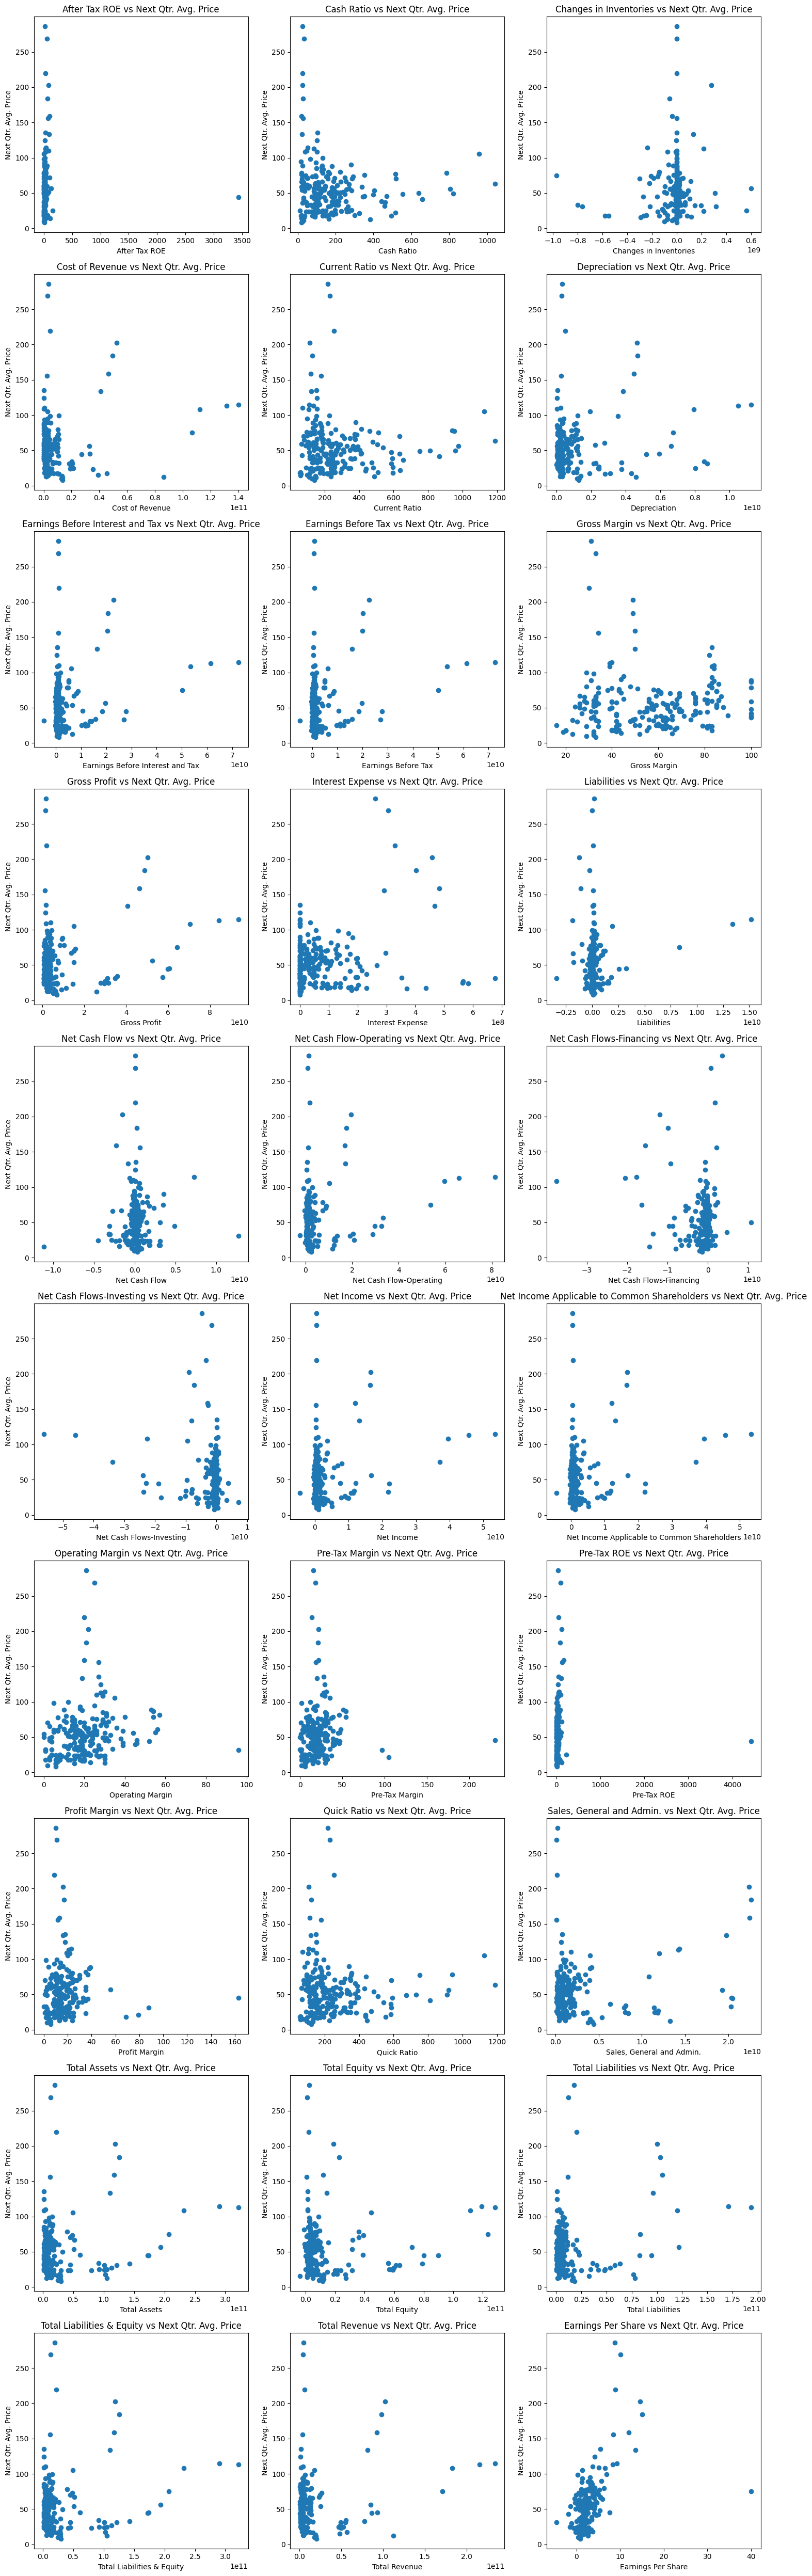

In [8]:
num_features = len(selected_features)

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_features//3 + (num_features % 3 > 0), ncols=3, figsize=(15, 5*num_features//3 + (num_features % 3 > 0)))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].scatter(final_it_data[feature], final_it_data['Next Qtr. Avg. Price'])
    axes[i].set_title(f'{feature} vs Next Qtr. Avg. Price')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Next Qtr. Avg. Price')

# Hide any unused subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
